# Utils functions

This notebook introduces functions included in `utils` module

## TOC:
* [Dealing python dictionary and json files](#first-bullet)
* [Rejection sampling functions](#second-bullet)
* [Interpolation generator](#third-bullet)
* [Inverse Transform Sampling](#fourth-bullet)
* [How to save the interpolation coefficients and use them later](#fifth-bullet)
* [Sampling in batches](#sixth-bullet)

## Dealing python dictionary and json files <a class="anchor" id="first-bullet"></a>

In [42]:
from ler.utils import save_json, append_json, add_dictionaries_together, get_param_from_json, trim_dictionary
import numpy as np

In [26]:
# example dictionary
gw_params_original = {'zs': np.array([3.73183043, 0.52355076, 2.49075098]),
 'geocent_time': np.array([1.25925574e+09, 1.26536444e+09, 1.25552898e+09]),
 'ra': np.array([3.32048854, 5.27956589, 0.87173164]),
 'dec': np.array([0.26631948, 0.73091405, 0.29441384]),
 'phase': np.array([2.20887256, 5.55796383, 0.07096603]),
 'psi': np.array([1.6606896 , 2.34158204, 2.84468041]),
 'theta_jn': np.array([0.43683841, 1.68025833, 0.76875154]),
 'luminosity_distance': np.array([33013.38094356,  2994.02935263, 20304.88024704]),
 'mass_1_source': np.array([34.13715831, 36.02136452, 19.35196858]),
 'mass_2_source': np.array([23.22808401, 28.67148514, 13.64229837]),
 'mass_1': np.array([161.53124434,  54.88037745,  67.55290328]),
 'mass_2': np.array([109.91135463,  43.6824631 ,  47.6218664 ]),
 'L1': np.array([0.       , 3.3533832, 0.3272596]),
 'H1': np.array([0.        , 2.82521613, 0.96988785]),
 'V1': np.array([0.        , 4.53670558, 0.99019192]),
 'snr_net': np.array([0.        , 6.30941539, 1.4241704 ])}

In [27]:
# save dictionary in json 
# save_json is a lighter and faster function but it will not recognize numpy arrays
gw_params_list = {}
for key, value in gw_params_original.items():
    gw_params_list[key] = value.tolist()
save_json('gw_param_test.json', gw_params_list)

# load json
# but get_param_from_json will convert the list back to numpy arrays
gw_params = get_param_from_json('gw_param_test.json')

print(gw_params)

{'zs': array([3.73183043, 0.52355076, 2.49075098]), 'geocent_time': array([1.25925574e+09, 1.26536444e+09, 1.25552898e+09]), 'ra': array([3.32048854, 5.27956589, 0.87173164]), 'dec': array([0.26631948, 0.73091405, 0.29441384]), 'phase': array([2.20887256, 5.55796383, 0.07096603]), 'psi': array([1.6606896 , 2.34158204, 2.84468041]), 'theta_jn': array([0.43683841, 1.68025833, 0.76875154]), 'luminosity_distance': array([33013.38094356,  2994.02935263, 20304.88024704]), 'mass_1_source': array([34.13715831, 36.02136452, 19.35196858]), 'mass_2_source': array([23.22808401, 28.67148514, 13.64229837]), 'mass_1': array([161.53124434,  54.88037745,  67.55290328]), 'mass_2': array([109.91135463,  43.6824631 ,  47.6218664 ]), 'L1': array([0.       , 3.3533832, 0.3272596]), 'H1': array([0.        , 2.82521613, 0.96988785]), 'V1': array([0.        , 4.53670558, 0.99019192]), 'snr_net': array([0.        , 6.30941539, 1.4241704 ])}


In [28]:
# In ler `append_json` function to save new or append dictionaries to a json file
# you dont need to convert numpy arrays to list. But `append_json` function is a bit slower
append_json('gw_param_test.json', gw_params_original, replace=True)  
# if 'gw_param_test.json'  already exists, you can use `replace=True` to replace the file
# if replace=False, it will append the dictionary

new_dict = {'zs': np.array([3.73183043]), 'geocent_time': np.array([1.25925574]), 'ra': np.array([3.32048854]), 'dec': np.array([0.26631948]), 'phase': np.array([2.20887256]), 'psi': np.array([1.6606896]), 'theta_jn': np.array([0.43683841]), 'luminosity_distance': np.array([33013.38094356]), 'mass_1_source': np.array([34.13715831]), 'mass_2_source': np.array([23.22808401]), 'mass_1': np.array([161.53124434]), 'mass_2': np.array([109.91135463]), 'L1': np.array([0.]), 'H1': np.array([0.]), 'V1': np.array([0.]), 'snr_net': np.array([0.])}

append_json('gw_param_test.json', new_dict, replace=False)

# load json
gw_params = get_param_from_json('gw_param_test.json')
print(gw_params)

{'zs': array([3.73183043, 0.52355076, 2.49075098, 3.73183043]), 'geocent_time': array([1.25925574e+09, 1.26536444e+09, 1.25552898e+09, 1.25925574e+00]), 'ra': array([3.32048854, 5.27956589, 0.87173164, 3.32048854]), 'dec': array([0.26631948, 0.73091405, 0.29441384, 0.26631948]), 'phase': array([2.20887256, 5.55796383, 0.07096603, 2.20887256]), 'psi': array([1.6606896 , 2.34158204, 2.84468041, 1.6606896 ]), 'theta_jn': array([0.43683841, 1.68025833, 0.76875154, 0.43683841]), 'luminosity_distance': array([33013.38094356,  2994.02935263, 20304.88024704, 33013.38094356]), 'mass_1_source': array([34.13715831, 36.02136452, 19.35196858, 34.13715831]), 'mass_2_source': array([23.22808401, 28.67148514, 13.64229837, 23.22808401]), 'mass_1': array([161.53124434,  54.88037745,  67.55290328, 161.53124434]), 'mass_2': array([109.91135463,  43.6824631 ,  47.6218664 , 109.91135463]), 'L1': array([0.       , 3.3533832, 0.3272596, 0.       ]), 'H1': array([0.        , 2.82521613, 0.96988785, 0.        ]

In [29]:
# add dictionaries values
# this also worcks for nested dictionaries
gw_params = add_dictionaries_together(gw_params_original, new_dict)
print(gw_params)

{'zs': array([3.73183043, 0.52355076, 2.49075098, 3.73183043]), 'geocent_time': array([1.25925574e+09, 1.26536444e+09, 1.25552898e+09, 1.25925574e+00]), 'ra': array([3.32048854, 5.27956589, 0.87173164, 3.32048854]), 'dec': array([0.26631948, 0.73091405, 0.29441384, 0.26631948]), 'phase': array([2.20887256, 5.55796383, 0.07096603, 2.20887256]), 'psi': array([1.6606896 , 2.34158204, 2.84468041, 1.6606896 ]), 'theta_jn': array([0.43683841, 1.68025833, 0.76875154, 0.43683841]), 'luminosity_distance': array([33013.38094356,  2994.02935263, 20304.88024704, 33013.38094356]), 'mass_1_source': array([34.13715831, 36.02136452, 19.35196858, 34.13715831]), 'mass_2_source': array([23.22808401, 28.67148514, 13.64229837, 23.22808401]), 'mass_1': array([161.53124434,  54.88037745,  67.55290328, 161.53124434]), 'mass_2': array([109.91135463,  43.6824631 ,  47.6218664 , 109.91135463]), 'L1': array([0.       , 3.3533832, 0.3272596, 0.       ]), 'H1': array([0.        , 2.82521613, 0.96988785, 0.        ]

In [44]:
# trim dictionary values to a specific length
print(f"orinal length: {gw_params_original['zs'].shape[0]}")

trimmed_gw_params = trim_dictionary(gw_params, 2)
print(f"trimmed length: {trimmed_gw_params['zs'].shape[0]}")
print(trimmed_gw_params)

orinal length: 3
trimmed length: 2
{'zs': array([3.73183043, 0.52355076]), 'geocent_time': array([1.25925574e+09, 1.26536444e+09]), 'ra': array([3.32048854, 5.27956589]), 'dec': array([0.26631948, 0.73091405]), 'phase': array([2.20887256, 5.55796383]), 'psi': array([1.6606896 , 2.34158204]), 'theta_jn': array([0.43683841, 1.68025833]), 'luminosity_distance': array([33013.38094356,  2994.02935263]), 'mass_1_source': array([34.13715831, 36.02136452]), 'mass_2_source': array([23.22808401, 28.67148514]), 'mass_1': array([161.53124434,  54.88037745]), 'mass_2': array([109.91135463,  43.6824631 ]), 'L1': array([0.       , 3.3533832]), 'H1': array([0.        , 2.82521613]), 'V1': array([0.        , 4.53670558]), 'snr_net': array([0.        , 6.30941539])}


## Rejection sampling functions <a class="anchor" id="second-bullet"></a>

In [58]:
from ler.utils import rejection_sample, rejection_sample2d
import numpy as np
import matplotlib.pyplot as plt

### 1-Dimensional example

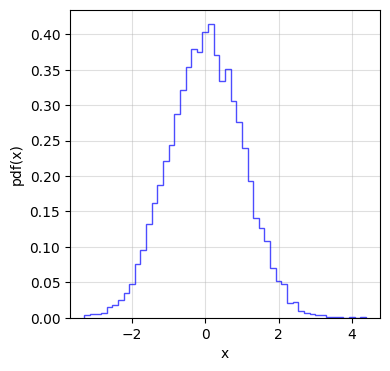

In [59]:
# normal distribution pdf function
def normal_pdf(x, mu=0, sigma=1):
    return 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (x - mu)**2 / (2 * sigma**2) )

# rejection sampling
samples = rejection_sample(
    pdf=normal_pdf,
    xmin=-5,
    xmax=5,
    size=10000,
    chunk_size=20000,
)

# plot histogram
plt.figure(figsize=(4, 4))
plt.hist(samples, bins=50, density=True, histtype='step', alpha=0.7, color='blue')
plt.xlabel('x')
plt.ylabel('pdf(x)')
plt.grid(alpha=0.4)
plt.show()

### 2-Dimensional example

In [32]:
# 2d normal distribution pdf function
def normal_pdf2d(x, y, mu=[0, 0], sigma=[1, 1]):
    return 1/(sigma[0] * sigma[1] * 2 * np.pi) * np.exp( - ((x - mu[0])**2 / (2 * sigma[0]**2) + (y - mu[1])**2 / (2 * sigma[1]**2)) )

# rejection sampling
samples = rejection_sample2d(
    pdf=normal_pdf2d,
    xmin=-5,
    xmax=5,
    ymin=-5,
    ymax=5,
    size=10000,
    chunk_size=20000,
)

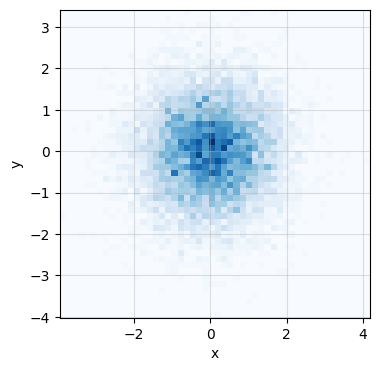

In [33]:
# plot 2d histogram
plt.figure(figsize=(4, 4))
plt.hist2d(samples[0], samples[1], bins=50, density=True, cmap='Blues')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(alpha=0.4)
plt.show()

## Interpolation generator <a class="anchor" id="third-bullet"></a>

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from ler.utils import create_func_pdf_invcdf

In [76]:
# Function to create a interpolated function, inverse function or inverse cdf from the input x and y.

# example with normal distribution
x = np.sort(np.random.uniform(-3, 3, 1000))
y = normal_pdf(x)

interpolated_function = create_func_pdf_invcdf(x, y, category="function")  # interpolated function
interpolated_function_inverse = create_func_pdf_invcdf(x, y, category="function_inverse") # x and y are swapped
interpolated_pdf = create_func_pdf_invcdf(x, y, category="pdf")  # probability density function
interpolated_invcdf = create_func_pdf_invcdf(x, y, category="inv_cdf")  # inverse cumulative distribution function

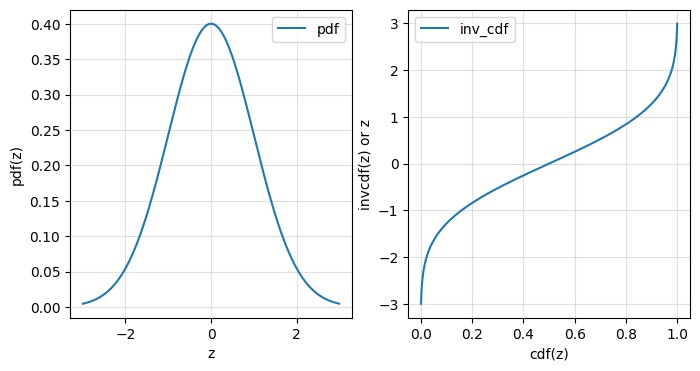

In [78]:
# plot interpolated_pdf, interpolated_invcdf
plt, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].plot(np.sort(x), interpolated_pdf(np.sort(x)), label='pdf')
ax[0].set_xlabel('z')
ax[0].set_ylabel('pdf(z)')
ax[0].legend()
ax[0].grid(alpha=0.4)

ax[1].plot(np.linspace(0,1,1000), interpolated_invcdf(np.linspace(0,1,1000)), label='inv_cdf')
ax[1].set_xlabel('cdf(z)')
ax[1].set_ylabel('invcdf(z) or z')
ax[1].legend()
ax[1].grid(alpha=0.4)

plt.show()


## Inverse Transform Sampling <a class="anchor" id="fourth-bullet"></a>

In [3]:
# note: inverse_transform_sampler is a njit function
from ler.utils import inverse_transform_sampler, create_inv_cdf_array
import numpy as np
import matplotlib.pyplot as plt

# example function with normal distribution
def normal_pdf(x, mu=0, sigma=1):
    return 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (x - mu)**2 / (2 * sigma**2) )

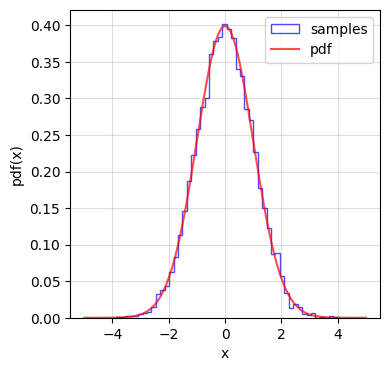

In [8]:
x = np.linspace(-5, 5, 1000)
y = normal_pdf(x)

# create inverse cdf array
cdf_array, x = create_inv_cdf_array(x, y)

# inverse transform sampling
samples = inverse_transform_sampler(size=10000, cdf=cdf_array, x=x)

# plot histogram
plt.figure(figsize=(4, 4))
plt.hist(samples, bins=50, density=True, histtype='step', alpha=0.7, color='blue', label='samples')
plt.plot(x, y, label='pdf', color='red', alpha=0.7)
plt.xlabel('x')
plt.ylabel('pdf(x)')
plt.legend()
plt.grid(alpha=0.4)
plt.show()

## How to save the interpolation coefficients and use them later <a class="anchor" id="fifth-bullet"></a>

In [104]:
from ler.utils import interpolator_from_pickle, cubic_spline_interpolator
import numpy as np
import matplotlib.pyplot as plt

# example function with normal distribution
def normal_pdf(x, mu=0, sigma=1):
    return 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (x - mu)**2 / (2 * sigma**2) )

In [101]:
# content of this dictionary decides whether to create a new interpolator or load from a pickle file
param_dict_given = { 'function': 'gaussian', 'mu': 0, 'sigma': 1 }

# create a cubic spline interpolator
# set create_new=False to load the interpolator from the pickle file, if it already exists
spline_coefficients, x_values = interpolator_from_pickle(
    param_dict_given=param_dict_given, 
    directory='interpolator_pickle', 
    sub_directory='test', 
    name="gaussian_interpolator", 
    x=np.linspace(-5, 5, 1000), 
    pdf_func=normal_pdf,
    # y=None,  # if y is None, it will be calculated from pdf_func 
    # conditioned_y=None, # this is used 2D pdfs
    dimension=1,
    category="pdf", 
    create_new=True,  # if False, it will load the interpolator from the pickle file
)

gaussian_interpolator interpolator will be generated at interpolator_pickle/test/gaussian_interpolator_0.pickle


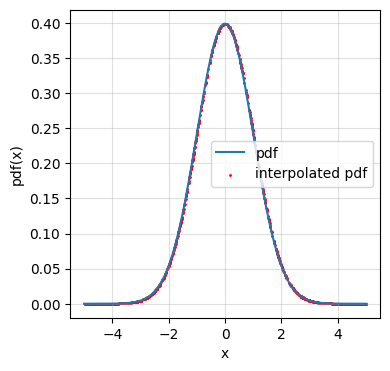

In [105]:
# let's use the interpolator
x_new = np.random.uniform(-5, 5, 1000)

# cubic spline interpolator is njit compiled and faster
pdf_values = cubic_spline_interpolator(x_new, spline_coefficients, x_values)

# plot
plt.figure(figsize=(4, 4))
plt.plot(x_values, normal_pdf(x_values), label='pdf')
plt.scatter(x_new, pdf_values, s=1, color='red', label='interpolated pdf')
plt.xlabel('x')
plt.ylabel('pdf(x)')
plt.legend()
plt.grid(alpha=0.4)
plt.show()

## Sampling in batches <a class="anchor" id="sixth-bullet"></a>

* `batch_handler` function allows sampling to be done in batches. This is useful when the number of samples is large and the memory is limited.

In [1]:
from ler.utils import batch_handler, create_inv_cdf_array, inverse_transform_sampler
import numpy as np
import matplotlib.pyplot as plt

# example function with normal distribution
def normal_pdf(x, mu=0, sigma=1):
    return 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (x - mu)**2 / (2 * sigma**2) )

In [2]:
x = np.linspace(-5, 5, 1000)
y = normal_pdf(x)

# create inverse cdf array
cdf_array, x = create_inv_cdf_array(x, y)

# inverse transform sampling
# sampling_routine should have only one argument, which is the size of the samples
def sampling_routine(size, cdf=cdf_array, x=x, **kwargs):
    print("sampling x  from pdf...")
    dict_ = {}
    dict_['x'] = inverse_transform_sampler(size=size, cdf=cdf, x=x)
    return dict_

In [3]:
# sampling in batches
x_values = batch_handler(
            size=10000,
            batch_size=5000,
            sampling_routine=sampling_routine,
            output_jsonfile="normal_distribution_samples.json",
            save_batch=False,
            resume=False,
            param_name="x values",
        )

chosen batch size = 5000 with total size = 10000
There will be 2 batche(s)
Batch no. 1
sampling x  from pdf...
Batch no. 2
sampling x  from pdf...
saving all x values in normal_distribution_samples.json 


In [4]:
# number of samples
print(f"number of samples: {len(x_values['x'])}")

number of samples: 10000


In [5]:
# let's resume to sample more data
# increase the size and resume=True
x_values = batch_handler(
            size=20000,
            batch_size=5000,
            sampling_routine=sampling_routine,
            output_jsonfile="normal_distribution_samples.json",
            save_batch=False,
            resume=True,
            param_name="x values",
        )

chosen batch size = 5000 with total size = 20000
There will be 4 batche(s)
resuming from normal_distribution_samples.json
Batch no. 3
sampling x  from pdf...
Batch no. 4
sampling x  from pdf...
saving all x values in normal_distribution_samples.json 


In [6]:
# number of samples
print(f"number of samples: {len(x_values['x'])}")

number of samples: 20000
